In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats

In [34]:
grid = np.linspace(1,10,10)

In [36]:
grid

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [102]:
def plot_normal_density(grid, tau, ax):
    dx = grid[1] - grid[0]
    plot_pts = np.linspace(grid.min(), grid.max(), 1000)
    for g in grid:
        dens = lambda x: sp.stats.norm(loc=g, scale=dx/tau).pdf(x)
        ax.plot(plot_pts, dens(plot_pts), color='blue', alpha=0.7)
        ax.axvline(g + dx/2, color='crimson', alpha=0.7)
        
    top = max(dens(plot_pts)) + 0.1
        
    for pt in grid[1::2]:
        ax.fill_between([pt-0.5, pt+0.5], 0, top, color='crimson', alpha=0.2)
    
    ax.set_xlabel("Grid ($t$)", fontsize=12)
    ax.set_ylabel("Probability", fontsize=12)
    ax.set_title(f"$\\tau = {tau}$", fontsize=15)
    
    ax.set_xlim((grid[0], grid[-1]))
    ax.set_ylim((0, top))

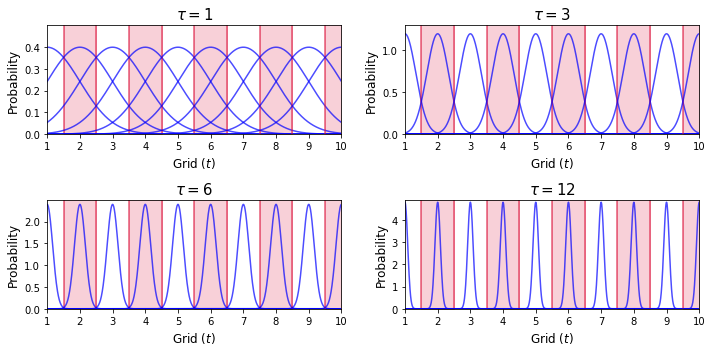

In [116]:
fig, ax = plt.subplots(2,2,figsize=(10,5))
plot_normal_density(grid, 1, ax[0,0])
plot_normal_density(grid, 3, ax[0,1])
plot_normal_density(grid, 6, ax[1,0])
plot_normal_density(grid, 12, ax[1,1])
fig.tight_layout()
plt.savefig("tau_sampling_effect")